# Recommender System

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Familiarization

First, we will load the entire dataset and visualize it to get a first look at what we are dealing with. We have decided to visualize the given data as a matrix where on column i we can see which people the person with id i liked/disliked by checking each line and putting either a green dot if they liked the person with id j (line j), or a red dot if they disliked them.

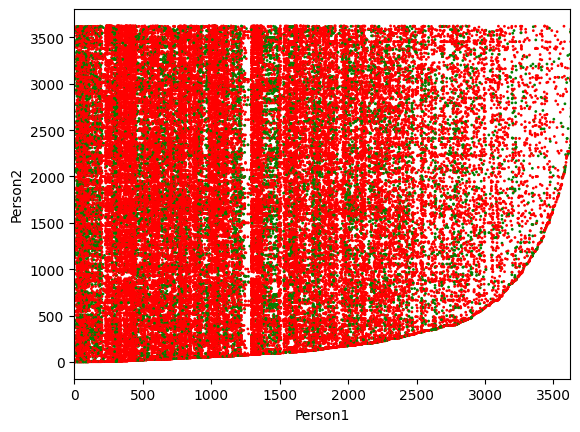

In [95]:
train_file_path = 'lab2_train.csv'

pd.set_option('display.max_rows', None)
train_data = pd.read_csv(train_file_path, delimiter=',', skipinitialspace= True)
#dropping the column related to matches as is mentioned in the assignment description
train_data = train_data.drop('is_match',axis=1)

def visualize_data(df, window=None, title=None):
    if window is None:
        start_index = 0
        end_index = train_data['user_to_id'].max()
    else:
        start_index, end_index = window
    plt.scatter(df['user_from_id'], df['user_to_id'], c=df['is_like'].map({True: 'green', False: 'red'}),s=1)

    plt.xlim(start_index,end_index)

    plt.xlabel('Person1')
    plt.ylabel('Person2')

    if title is not None:
        plt.title(title)

    plt.show()

visualize_data(train_data)

On a first glance, one can easily see that users with id greater than ~2500 rate(like/dislike) a lot less than the others. There are also certain groups(intervals of columns) of people that like a lot/dislike a lot. To show a couple of examples, we will plot a few smaller window of columns that demonstrate users that mostly dislike others, and also print a list of the people who have only ever liked others, without any dislikes.

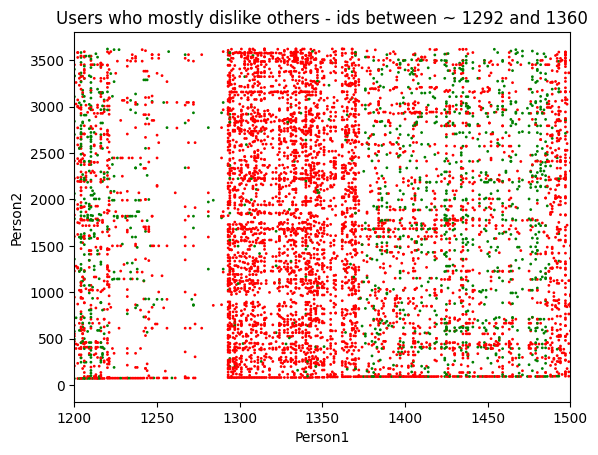

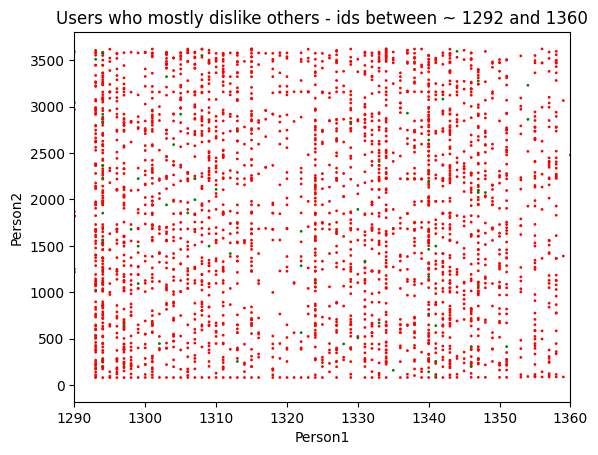

List of 100 ids of users who only liked others.
3604
3608
3212
3663
3674
7
2530
3607
2907
3050
3305
3385
792
3583
2773
3584
3609
2658
2341
2528
3349
3549
2926
2369
2422
3443
2157
3168
2427
3539
2066
1259
3605
2969
2781
2970
125
3677
3540
2284
820
1515
3599
2355
3586
3335
3707
3228
3347
3654
2659
1257
3497
3682
3259
2480
3380
3446
2755
3619
2503
3688
2944
3131
3197
3714
2829
1590
2269
1791
3183
1701
2725
3108
1176
2648
3176
2870
2591
2748
3177
3585
3178
2205
3601
2842
2426
674
1271
3672
3379


In [103]:
visualize_data(train_data, (1290,1360), "Users who mostly dislike others - ids between ~ 1292 and 1360")

id_counts = list(train_data[(train_data['is_like'] == True) | (train_data['is_like'] == False)]['user_from_id'].value_counts().items())
filtered_data = train_data[train_data['is_like'] == True]
like_counts = list(filtered_data['user_from_id'].value_counts().items())

all_likes_tuples = list(set(id_counts) & set(like_counts))
all_likes = [v[0] for v in all_likes_tuples]
print("List of 100 ids of users who only liked others.")
for id in all_likes:
    print(id)

Thus, we can observe that multiple types of people exist in our dataset. There are also examples of intervals where a lot of users did not have any type of interaction, i.e between 1250 and 1300 most users seem to not have many if any interactions at all.